In [13]:
import os
import pickle
import numpy as np
import pandas as pd
from os import path
import seaborn as sns
from operator import add
from scipy import sparse, io
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from dotenv import load_dotenv, find_dotenv
from sklearn.preprocessing import LabelEncoder
%matplotlib notebook

dotenv_path = find_dotenv()
load_dotenv(dotenv_path)

RAW_DATA_DIR = os.environ.get("RAW_DATA_DIR")

In [14]:
train = pd.read_csv(path.join(RAW_DATA_DIR, 'gender_age_train.csv'))
events = pd.read_csv(path.join(RAW_DATA_DIR, 'events.csv'), parse_dates=['timestamp'])
app_events = pd.read_csv(path.join(RAW_DATA_DIR, 'app_events.csv'))

In [15]:
train = train.sort_values(by='age')
events = events.drop(['longitude', 'latitude'], 1)
app_events['app_id'], map_ids = pd.factorize(app_events['app_id'])

In [16]:
labelled_app_events = (train.merge(events, how='left', on='device_id')
                            .merge(app_events, how='left', on='event_id')
                            )
labelled_app_events = labelled_app_events.fillna(-1)

<IPython.core.display.Javascript object>


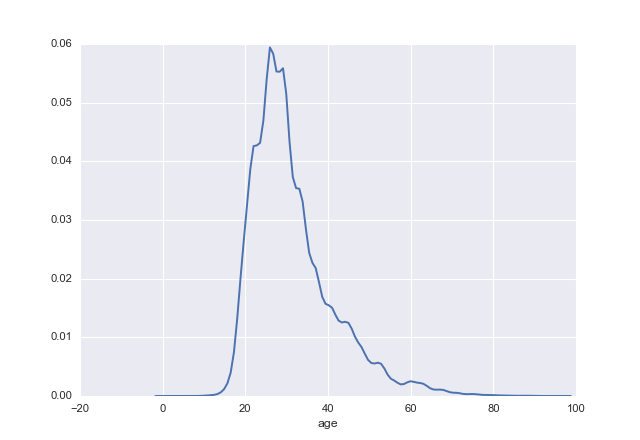

In [17]:
plt.figure()
sns.distplot(train['age'], hist=False)


<IPython.core.display.Javascript object>


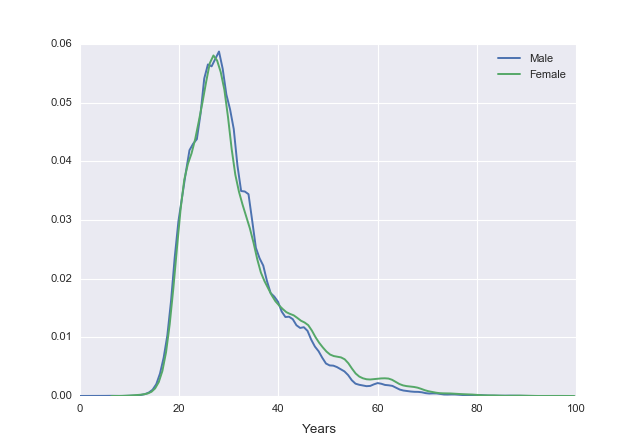

In [18]:
plt.figure()

sns.kdeplot(train.age[train['gender']=="M"], label="Male")
sns.kdeplot(train.age[train['gender']=="F"],  label="Female").axes.set_xlim(0,100)
plt.annotate('Years', (0,0), (200, -25), xycoords='axes fraction', 
             textcoords='offset points', va='top')
plt.legend()

<IPython.core.display.Javascript object>


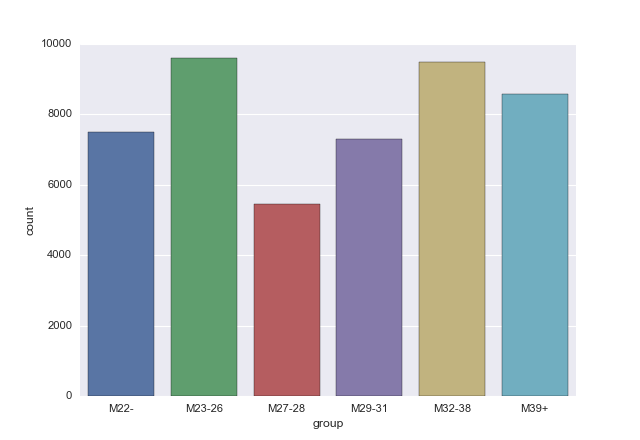

Male age group count


In [19]:
plt.figure()

print("Male age group count")
ax = sns.countplot(x="group", data=train[train['gender']=="M"])

<IPython.core.display.Javascript object>


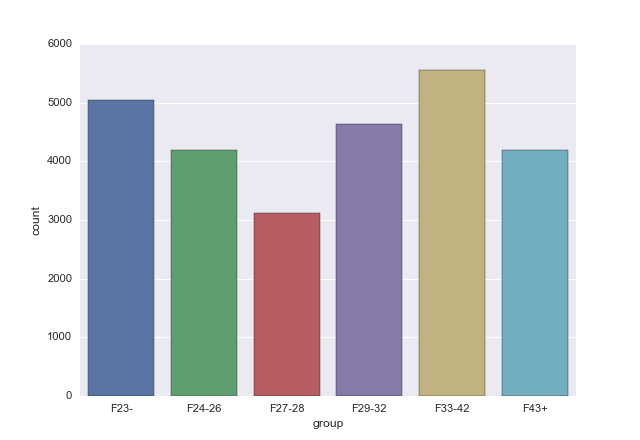

Female age group count


In [20]:
plt.figure()
print("Female age group count")
ax = sns.countplot(x="group", data=train[train['gender']=="F"])

## Day

In [23]:
labelled_app_events.head()

,device_id,gender,age,group,event_id,timestamp,app_id,is_installed,is_active,week_day
0,3553057874282315257,M,1,M22-,-1.0,1969-12-31 23:59:59.999999999,-1.0,-1.0,-1.0,Wednesday
1,5222152119137955379,M,6,M22-,-1.0,1969-12-31 23:59:59.999999999,-1.0,-1.0,-1.0,Wednesday
2,3646841514566479686,M,6,M22-,-1.0,1969-12-31 23:59:59.999999999,-1.0,-1.0,-1.0,Wednesday
3,-8513863533705424532,M,6,M22-,-1.0,1969-12-31 23:59:59.999999999,-1.0,-1.0,-1.0,Wednesday
4,-5323874218045578676,M,6,M22-,-1.0,1969-12-31 23:59:59.999999999,-1.0,-1.0,-1.0,Wednesday


<IPython.core.display.Javascript object>


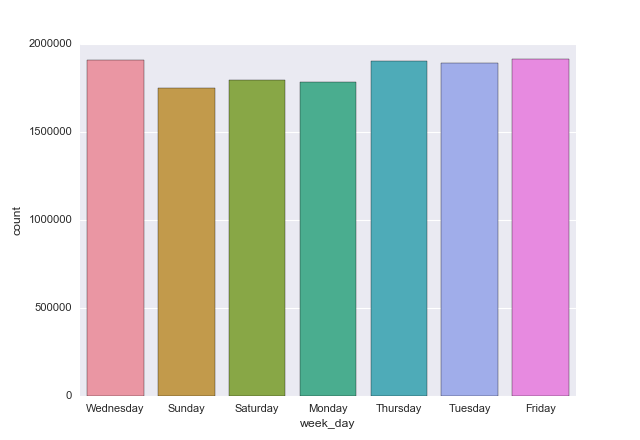

In [21]:
import calendar
labelled_app_events['week_day'] = labelled_app_events.timestamp.apply(lambda x: calendar.day_name[x.weekday()])
plt.figure()
ax = sns.countplot(x="week_day", data=labelled_app_events)

<IPython.core.display.Javascript object>


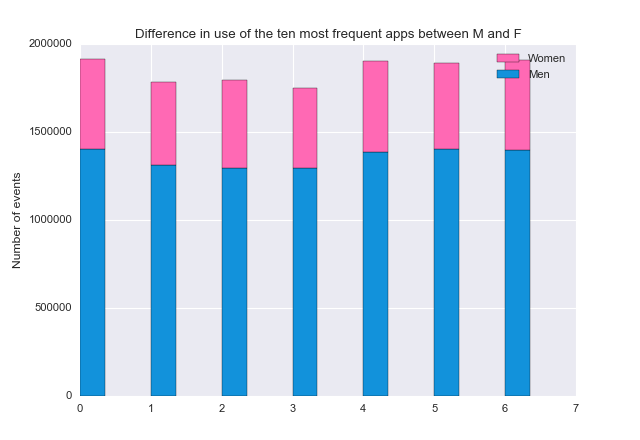

In [22]:
days = np.sort(labelled_app_events['week_day'].unique())
ind = np.arange(len(days))  # the x locations for the groups
width = 0.35

male_days = []
female_days = []
for day in days:
    day_rows = labelled_app_events[ labelled_app_events['week_day'] == day]
    female_days.append(len(day_rows.query('gender == "F"')))
    male_days.append(len(day_rows.query('gender == "M"')))
plt.figure()

p1 = plt.bar(ind, male_days, width, color="#1292db")
p2 = plt.bar(ind, female_days, width, color="#ff69b4", bottom=male_days)

plt.ylabel('Number of events')
plt.title('Difference in use of the ten most frequent apps between M and F')
plt.legend((p2[0], p1[0]), ('Women', 'Men'))
plt.show()

In [11]:
tot = map(add, female_days, male_days)
total = pd.Series(tot, index=range(len(male_days)))
f_users = list(female_days/total)
m_users = list(male_days/total)

f_users = [ '%.3f' % elem for elem in f_users]
m_users = [ '%.3f' % elem for elem in m_users]

print "During the whole day the percentage of users are: "
print "- females: {}\n- males: {}".format(f_users, m_users)

During the whole day the percentage of users are: 
- females: ['0.268', '0.264', '0.277', '0.261', '0.272', '0.258', '0.270']
- males: ['0.732', '0.736', '0.723', '0.739', '0.728', '0.742', '0.730']


<IPython.core.display.Javascript object>


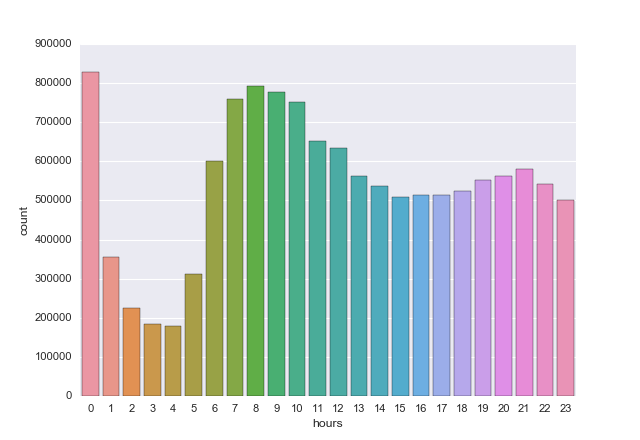

In [12]:
plt.figure()
labelled_app_events['hours'] = labelled_app_events['timestamp'].apply(lambda x: x.hour)
ax = sns.countplot(x='hours', data=labelled_app_events)

<IPython.core.display.Javascript object>


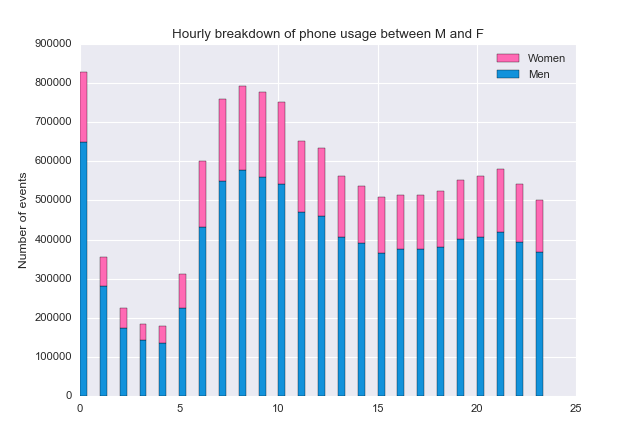

In [16]:
hours = np.sort(labelled_app_events['hours'].unique())
ind = np.arange(len(hours))  # the x locations for the groups
width = 0.35

male_hours = []
female_hours = []
for hour in hours:
    hour_rows = labelled_app_events[ labelled_app_events['hours'] == hour]
    female_hours.append(len(hour_rows.query('gender == "F"')))
    male_hours.append(len(hour_rows.query('gender == "M"')))

plt.figure()
p1 = plt.bar(ind, male_hours, width, color="#1292db")
p2 = plt.bar(ind, female_hours, width, color="#ff69b4", bottom=male_hours)
plt.ylabel('Number of events')
plt.title('Hourly breakdown of phone usage between M and F')
plt.legend((p2[0], p1[0]), ('Women', 'Men'))
plt.show()

In [17]:
tot = map(add, female_hours, male_hours)
total = pd.Series(tot, index=range(len(male_hours)))
f_users = list(female_hours/total)
m_users = list(male_hours/total)

f_users = [ '%.3f' % elem for elem in f_users]
m_users = [ '%.3f' % elem for elem in m_users]

print "During the whole day the percentage of users are: "
print "- females: {}\n- males: {}".format(f_users, m_users)

During the whole day the percentage of users are: 
- females: ['0.215', '0.209', '0.228', '0.226', '0.243', '0.280', '0.282', '0.275', '0.269', '0.279', '0.280', '0.277', '0.274', '0.278', '0.270', '0.283', '0.270', '0.271', '0.271', '0.276', '0.274', '0.278', '0.271', '0.264']
- males: ['0.785', '0.791', '0.772', '0.774', '0.757', '0.720', '0.718', '0.725', '0.731', '0.721', '0.720', '0.723', '0.726', '0.722', '0.730', '0.717', '0.730', '0.729', '0.729', '0.724', '0.726', '0.722', '0.729', '0.736']


In [39]:
age_h_f = (labelled_app_events[labelled_app_events['gender'] == 'F']
           .groupby(['hours', 'group'])
           .agg('count')
           )
age_h_m = (labelled_app_events[labelled_app_events['gender'] == 'M']
           .groupby(['hours', 'group'])
           .agg('count')
           )
age_h = (labelled_app_events
           .groupby(['hours', 'group'])
           .agg('count')
           )


In [40]:
age_h = age_h['device_id'].reset_index()
groups = age_h.pivot(index='hours', columns='group')


<IPython.core.display.Javascript object>


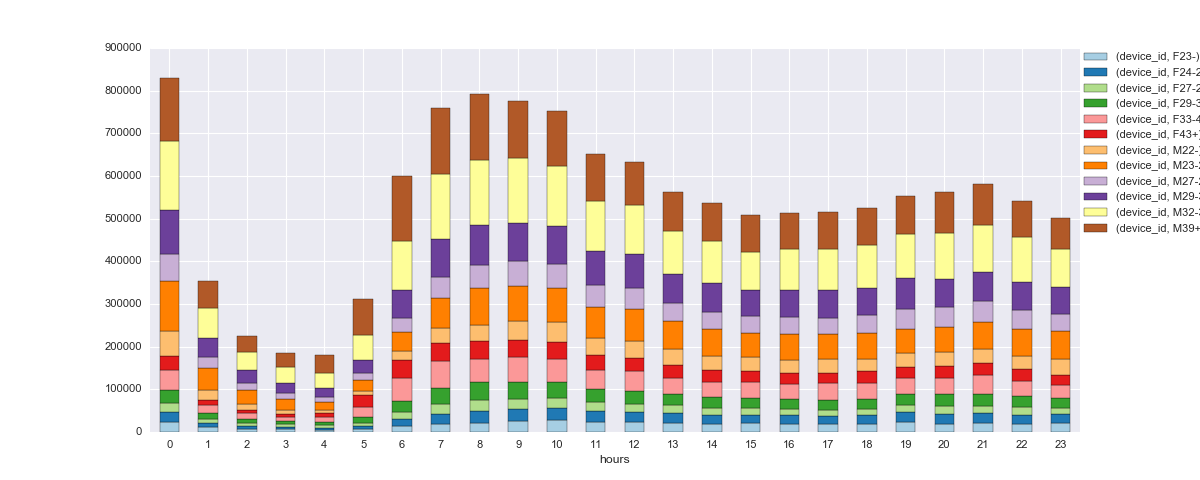

In [59]:
ax = groups.plot(kind='bar', stacked=True, colormap='Paired', rot=0, figsize=(15,6))
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
handles, labels = ax.get_legend_handles_labels()